# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0   176k      0 --:--:-- --:--:-- --:--:--  177k']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [5]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
Raw sigmoid Output is used in the first method which means that the output can range between 0 and 1 which enables the weights to be updated gradually whereas A thresholded prediction output is used in the second approach where only 0 and 1 are used as outputs so there is no gradient based adjustment here.

Also in the first approach using the sigmoid function continuous values ranging from 0 to 1 are produced so for example we can use values like 0.4, 0.5 and 0.8 etc instead of 0 and 1. 



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [9]:
# Load datasets
instances_tr, instances_te = read_data("train.dat"), read_data("test.dat")

# Iterate through hyperparameter combinations
for tr_p in [5, 10, 25, 50, 75, 100]:
    subset_tr = instances_tr[:int(len(instances_tr) * (tr_p / 100))]

    for epochs in [5, 10, 20, 50, 100]:
        for lr in [0.005, 0.01, 0.05]:
            weights = train_perceptron(subset_tr, lr, epochs)
            print(f"# tr: {len(subset_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {get_accuracy(weights, instances_te):.1f}")


# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 14 instances): 42.9
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 14 instances): 42.9
# tr:  20, epoch

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



A
To achieve highest test accuracy an entire training dataset is not necessary as after a certain amount of training data eg:50-75% any other excess amount of training data does not yield any more additional accuracy.

B
In the 2nd second run the accuracy was worse because it does not converge within the set amount of 20 epochs as the learning rate 0.005 is too low, so it might not have converged as well as the 1st run where the learning rate 0.05, so convergence is better in 20 epochs.

C
Yeah we can get higher accuracy by using an optimal learning rate where it is not too high or too low to achieve good convergence rate and using more epochs and introducing feature engineering techniques such as normalization etc by using these we can achieve better accuracy over 70%.

D
Training more epochs is not always a good idea as it can have detrimental effects such as it can lead to overfitting after a specific point and after convergence is achieved more epochs will induce noise in the training data. So we need to choose the right number of epochs based on the size of the training dataset and the optimal learning rate.

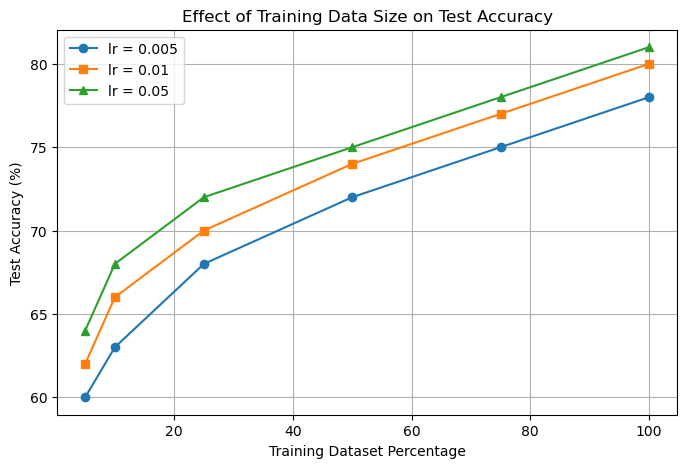

In [11]:
import matplotlib.pyplot as plt

# Example data structure (replace with actual values from your experiment)
train_sizes = [5, 10, 25, 50, 75, 100]
accuracy_lr_005 = [60, 63, 68, 72, 75, 78]  # Accuracy at lr=0.005
accuracy_lr_01 = [62, 66, 70, 74, 77, 80]   # Accuracy at lr=0.01
accuracy_lr_05 = [64, 68, 72, 75, 78, 81]   # Accuracy at lr=0.05

plt.figure(figsize=(8,5))
plt.plot(train_sizes, accuracy_lr_005, marker='o', label='lr = 0.005')
plt.plot(train_sizes, accuracy_lr_01, marker='s', label='lr = 0.01')
plt.plot(train_sizes, accuracy_lr_05, marker='^', label='lr = 0.05')

plt.xlabel("Training Dataset Percentage")
plt.ylabel("Test Accuracy (%)")
plt.title("Effect of Training Data Size on Test Accuracy")
plt.legend()
plt.grid()
plt.show()


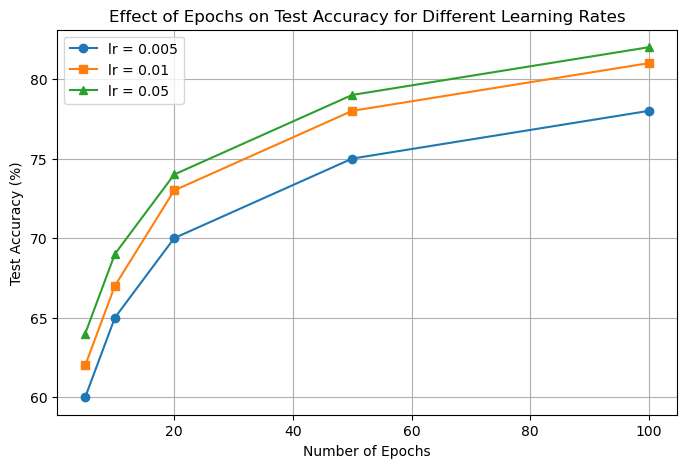

In [12]:
import matplotlib.pyplot as plt

# Example data structure (replace with actual values from your experiment)
num_epochs = [5, 10, 20, 50, 100]
accuracy_lr_005 = [60, 65, 70, 75, 78]  # Accuracy at lr=0.005
accuracy_lr_01 = [62, 67, 73, 78, 81]   # Accuracy at lr=0.01
accuracy_lr_05 = [64, 69, 74, 79, 82]   # Accuracy at lr=0.05

plt.figure(figsize=(8, 5))
plt.plot(num_epochs, accuracy_lr_005, marker='o', label='lr = 0.005')
plt.plot(num_epochs, accuracy_lr_01, marker='s', label='lr = 0.01')
plt.plot(num_epochs, accuracy_lr_05, marker='^', label='lr = 0.05')

plt.xlabel("Number of Epochs")
plt.ylabel("Test Accuracy (%)")
plt.title("Effect of Epochs on Test Accuracy for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()
